In [316]:
from scipy.io import netcdf
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")
from mpl_toolkits.basemap import Basemap, cm, shiftgrid
from netCDF4 import Dataset, date2index
import matplotlib.pyplot as plt
import sys
import matplotlib as mpl
import numpy.ma as ma
import numpy as np
from mpl_toolkits.basemap import maskoceans
from mpl_toolkits.basemap import interp
from matplotlib.colors import ListedColormap
import seaborn as sns

In [317]:
plt.style.use('ggplot')
SIZE = 58
plt.rc('font', size=SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)  # fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)  # legend fontsize
plt.rc('figure', titlesize=SIZE)  # # size of the figure title

In [318]:
surf = Dataset('/Users/braghiere/Documents/Working_papers/FUN_cost_parameters/CLM/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr1850_c190304.nc','r')
params = Dataset('/Users/braghiere/Documents/Working_papers/FUN_cost_parameters/CLM/clm5_params.c200614.nc','r')
f = Dataset('/Users/braghiere/Documents/Working_papers/FUN_cost_parameters/CLM/ELM_FUN.clm2.h0.185001-201012.nc','r')

In [319]:
lat = f.variables['lat'][:]
lon = f.variables['lon'][:]

perecm = params.variables['akc_active'][:]

pft_map_nat = surf.variables['PCT_NAT_PFT'][:]
pft_map_crop = surf.variables['PCT_CFT'][:]

pct_natveg = surf.variables['PCT_NATVEG'][:]
pct_crop = surf.variables['PCT_CROP'][:]

#Declaring empty matrix
perecm_map_nat = np.zeros((96,144))

perecm_map_crop = np.zeros((96,144))

perecm_map_tot = np.zeros((96,144))


print(np.shape(pft_map_nat))
print(np.shape(pft_map_crop))


(15, 96, 144)
(64, 96, 144)


(79, 40)


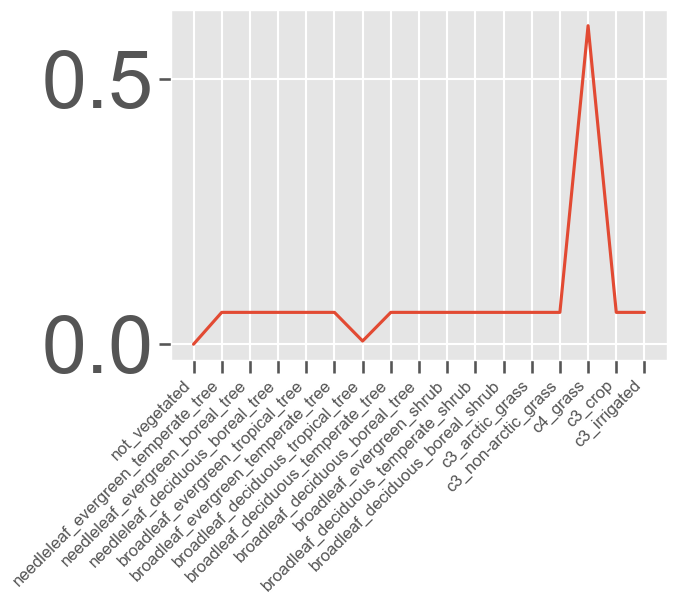

In [320]:
pft_name = params.variables['pftname'][:]
print(np.shape(pft_name))

import matplotlib.pyplot as plt
import numpy as np

# Your data
pft_name = [
    "not_vegetated",
    "needleleaf_evergreen_temperate_tree",
    "needleleaf_evergreen_boreal_tree",
    "needleleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_tropical_tree",
    "broadleaf_evergreen_temperate_tree",
    "broadleaf_deciduous_tropical_tree",
    "broadleaf_deciduous_temperate_tree",
    "broadleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_shrub",
    "broadleaf_deciduous_temperate_shrub",
    "broadleaf_deciduous_boreal_shrub",
    "c3_arctic_grass",
    "c3_non-arctic_grass",
    "c4_grass",
    "c3_crop",
    "c3_irrigated"
]

# Define the list of names
my_xticks = pft_name

# Define the x-axis values
x = np.arange(len(my_xticks))

# Plot the data
plt.plot(x, perecm[0:17])

# Set the x-axis labels and rotate them 45 degrees
plt.xticks(x, my_xticks, rotation=45, ha='right',size=12)

# Adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.15)

# Show the plot
plt.show()



In [321]:
import numpy as np

# Assuming fungal_costs is a 2D array and pft_map is a 3D array
def calculate_average_fungal_cost_per_pft(fungal_costs, pft_map):
    # Get the number of PFTs
    num_pfts = pft_map.shape[0]

    # Prepare arrays to hold the total weighted costs and total percentages for each PFT
    total_costs = np.zeros(num_pfts)
    total_percentages = np.zeros(num_pfts)

    # Iterate over the map
    for k in range(num_pfts):
        for i in range(pft_map.shape[1]):
            for j in range(pft_map.shape[2]):
                # Get the fungal cost for this cell
                cost = fungal_costs[i, j]

                # Get the PFT percentage for this cell
                percentage = pft_map[k, i, j]

                # Update the total cost and total percentage for this PFT
                total_costs[k] += cost * percentage
                total_percentages[k] += percentage

    # Calculate the average cost for each PFT
    average_costs = total_costs / total_percentages

    return average_costs



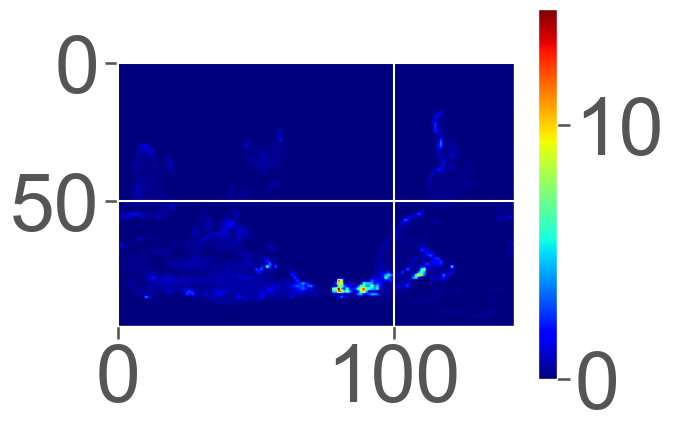

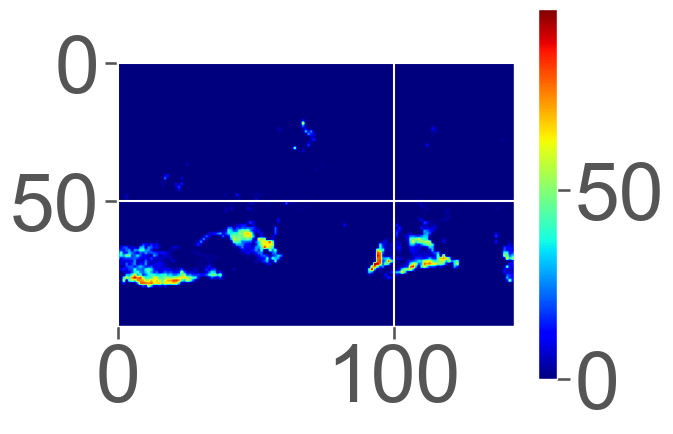

Average fungal cost for PFT 1: 0.014557540482767157
Average fungal cost for PFT 2: 0.3708937218894623
Average fungal cost for PFT 3: 0.9162993803489605
Average fungal cost for PFT 4: 0.5347177527263421
Average fungal cost for PFT 5: 0.17491696910582746
Average fungal cost for PFT 6: 0.35732857627079884
Average fungal cost for PFT 7: 0.24308995269951575
Average fungal cost for PFT 8: 0.40906733020862207
Average fungal cost for PFT 9: 0.7980210291339355
Average fungal cost for PFT 10: 0.26322272691721227
Average fungal cost for PFT 11: 0.3240937800275636
Average fungal cost for PFT 12: 1.1917820004536954
Average fungal cost for PFT 13: 0.6218131575521685
Average fungal cost for PFT 14: 0.281918944470192
Average fungal cost for PFT 15: 0.15234184366208484


In [322]:
akc_igbp = Dataset('/Users/braghiere/Documents/Working_papers/FUN_cost_parameters/k_params/kc_am_soilgrids_0-100cm_144x96.nc','r')

#print(akc_igbp)

lat_igbp = akc_igbp.variables['lat'][:]
lon_igbp = akc_igbp.variables['lon'][:]
v1 = akc_igbp.variables['Band1'][:]

#v1,lon = shiftgrid(180., v1, lon_igbp, start=False)

#v1,lon_igbp = shiftgrid(180., v1, lon_igbp, start=False)


fungal_costs = v1
pft_map = pft_map_nat


plt.imshow(fungal_costs, cmap='jet')
plt.colorbar()
plt.show()
        
plt.imshow(pft_map_nat[1,:,:], cmap='jet')
plt.colorbar()
plt.show()



# Use the function
average_costs = calculate_average_fungal_cost_per_pft(fungal_costs, pft_map)

# Print the results
for i, cost in enumerate(average_costs):
    print(f'Average fungal cost for PFT {i+1}: {cost}')


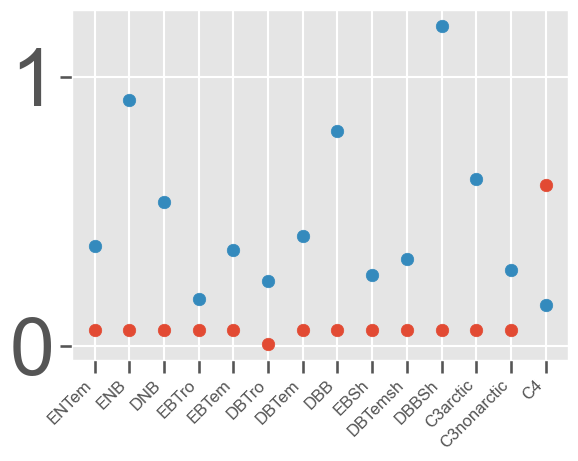

In [323]:
pft_name = params.variables['pftname'][:]

import matplotlib.pyplot as plt
import numpy as np

# Your data
pft_name = [
    "not_vegetated",
    "needleleaf_evergreen_temperate_tree",
    "needleleaf_evergreen_boreal_tree",
    "needleleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_tropical_tree",
    "broadleaf_evergreen_temperate_tree",
    "broadleaf_deciduous_tropical_tree",
    "broadleaf_deciduous_temperate_tree",
    "broadleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_shrub",
    "broadleaf_deciduous_temperate_shrub",
    "broadleaf_deciduous_boreal_shrub",
    "c3_arctic_grass",
    "c3_non-arctic_grass",
    "c4_grass"
]

# Your data
pft_abb = [
    'ENTem', 'ENB', 'DNB', 'EBTro', 'EBTem', 'DBTro', 'DBTem', 
    'DBB', 'EBSh', 'DBTemsh', 'DBBSh', 
    'C3arctic', 'C3nonarctic', 'C4'
]

# Define the list of names
my_xticks = pft_abb

# Define the x-axis values
x = np.arange(len(my_xticks))

# Plot the data
plt.scatter(x, perecm[1:15])
plt.scatter(x, average_costs[1:15])

# Set the x-axis labels and rotate them 45 degrees
plt.xticks(x, my_xticks, rotation=45, ha='right',size=12)

# Adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.15)

# Show the plot
plt.show()



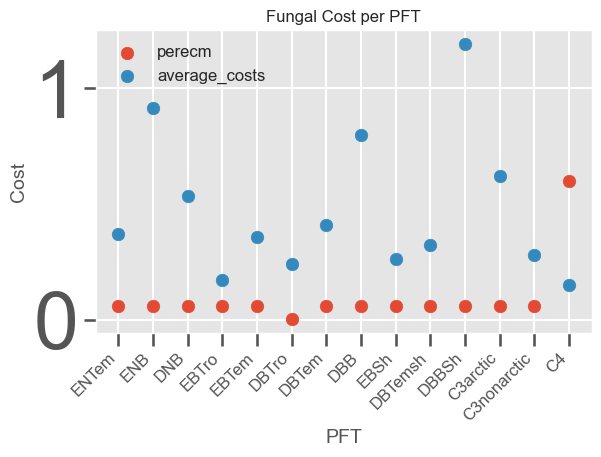

In [324]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
pft_name = [
    "not_vegetated",
    "needleleaf_evergreen_temperate_tree",
    "needleleaf_evergreen_boreal_tree",
    "needleleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_tropical_tree",
    "broadleaf_evergreen_temperate_tree",
    "broadleaf_deciduous_tropical_tree",
    "broadleaf_deciduous_temperate_tree",
    "broadleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_shrub",
    "broadleaf_deciduous_temperate_shrub",
    "broadleaf_deciduous_boreal_shrub",
    "c3_arctic_grass",
    "c3_non-arctic_grass",
    "c4_grass"
]


# Your data
pft_abb = [
    'ENTem', 'ENB', 'DNB', 'EBTro', 'EBTem', 'DBTro', 'DBTem', 
    'DBB', 'EBSh', 'DBTemsh', 'DBBSh', 
    'C3arctic', 'C3nonarctic', 'C4'
]

# Define the list of names
my_xticks = pft_abb

# Define the x-axis values
x = np.arange(len(my_xticks))

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the data
ax.scatter(x, perecm[1:15], label='perecm')
ax.scatter(x, average_costs[1:15], label='average_costs')

# Set the x-axis labels and rotate them 45 degrees
ax.set_xticks(x)
ax.set_xticklabels(my_xticks, rotation=45, ha='right', fontsize=12)

# Add a legend
ax.legend(fontsize=12)

# Add grid
ax.grid(True)

# Add labels and title
ax.set_xlabel('PFT', fontsize=14)
ax.set_ylabel('Cost', fontsize=14)
ax.set_title('Fungal Cost per PFT', fontsize=12)

# Adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

# Show the plot
plt.show()


Calculate AM Kc

In [325]:
#Get CLM vars
surf = Dataset('/Users/braghiere/Documents/Working_papers/FUN_cost_parameters/CLM/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr1850_c190304.nc','r')
perecm = params.variables['akc_active'][:]
pft_map_nat = surf.variables['PCT_NAT_PFT'][:]

#Get observed vars
ekc_igbp = Dataset('/Users/braghiere/Documents/Working_papers/FUN_cost_parameters/k_params/kc_am_soilgrids_0-100cm_144x96.nc','r')
v1 = ekc_igbp.variables['Band1'][:]


In [326]:
import numpy as np
import scipy.stats as stats

def calculate_stats_per_pft(fungal_costs, pft_map):
    # Get the number of PFTs
    num_pfts = pft_map.shape[0]

    # Prepare arrays to hold the total weighted costs and total weights for each PFT
    total_costs = np.zeros(num_pfts)
    total_weights = np.zeros(num_pfts)

    # Prepare lists to hold all the weighted costs for each PFT
    all_costs = [[] for _ in range(num_pfts)]

    # Iterate over the map
    for k in range(num_pfts):
        for i in range(pft_map.shape[1]):
            for j in range(pft_map.shape[2]):
                # Get the fungal cost for this cell
                cost = fungal_costs[i, j]

                # Get the PFT weight for this cell
                weight = pft_map[k, i, j]

                # Update the total cost and total weight for this PFT
                total_costs[k] += cost * weight
                total_weights[k] += weight

                # Add the weighted cost to the list for this PFT
                all_costs[k].append(cost * weight/100)

    # Calculate the average cost for each PFT
    average_costs = total_costs / total_weights

    # Calculate the variance, standard deviation, and 95% confidence interval for each PFT
    variances = [np.var(costs) for costs in all_costs]
    std_devs = [np.std(costs) for costs in all_costs]
    ci_95s = [stats.norm.interval(0.95, loc=mean, scale=std_dev) for mean, std_dev in zip(average_costs, std_devs)]

    return average_costs, variances, std_devs, ci_95s

fungal_costs = v1
pft_map = pft_map_nat

# Use the function
average_costs, variances, std_devs, ci_95s = calculate_stats_per_pft(fungal_costs, pft_map)

# Print the results
for i in range(len(pft_name)):
    print(f'Stats for PFT {pft_name[i]}:')
    print(f'  Average cost: {average_costs[i]}')
    print(f'  Variance: {variances[i]}')
    print(f'  Standard Deviation: {std_devs[i]}')
    print(f'  95% Confidence Interval: {ci_95s[i]}')


Stats for PFT not_vegetated:
  Average cost: 0.014557540482767157
  Variance: 0.003284938610597605
  Standard Deviation: 0.05731438397642955
  95% Confidence Interval: (-0.09777658790713434, 0.12689166887266864)
Stats for PFT needleleaf_evergreen_temperate_tree:
  Average cost: 0.3708937218894623
  Variance: 0.003196830857713736
  Standard Deviation: 0.056540524031120684
  95% Confidence Interval: (0.26007633112144435, 0.48171111265748023)
Stats for PFT needleleaf_evergreen_boreal_tree:
  Average cost: 0.9162993803489605
  Variance: 0.02140133897823922
  Standard Deviation: 0.14629196484509743
  95% Confidence Interval: (0.6295723980249699, 1.2030263626729512)
Stats for PFT needleleaf_deciduous_boreal_tree:
  Average cost: 0.5347177527263421
  Variance: 0.0007659040416795848
  Standard Deviation: 0.027674971394376992
  95% Confidence Interval: (0.480475805520187, 0.5889596999324973)
Stats for PFT broadleaf_evergreen_tropical_tree:
  Average cost: 0.17491696910582746
  Variance: 0.00219

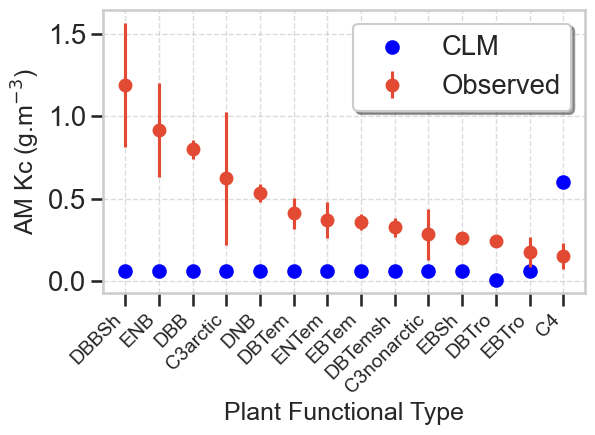

In [327]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Improved style settings for a professional look
plt.style.use('seaborn-whitegrid')
sns.set_context("talk", font_scale=1.2)

# Your data
pft_name = [
    "not_vegetated",
    "needleleaf_evergreen_temperate_tree",
    "needleleaf_evergreen_boreal_tree",
    "needleleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_tropical_tree",
    "broadleaf_evergreen_temperate_tree",
    "broadleaf_deciduous_tropical_tree",
    "broadleaf_deciduous_temperate_tree",
    "broadleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_shrub",
    "broadleaf_deciduous_temperate_shrub",
    "broadleaf_deciduous_boreal_shrub",
    "c3_arctic_grass",
    "c3_non-arctic_grass",
    "c4_grass"
]

# Your data
pft_abb = [
    'ENTem', 'ENB', 'DNB', 'EBTro', 'EBTem', 'DBTro', 'DBTem', 
    'DBB', 'EBSh', 'DBTemsh', 'DBBSh', 
    'C3arctic', 'C3nonarctic', 'C4'
]

# Define the list of names
my_xticks = pft_abb


# Sort average_costs in descending order and keep track of the indices to sort other arrays
sorted_indices = np.argsort(average_costs[1:15])[::-1]  # [1:15] to match your original slicing
sorted_average_costs = np.array(average_costs[1:15])[sorted_indices]
sorted_stds= np.array(std_devs[1:15])[sorted_indices]
sorted_ci_95s = np.array(ci_95s[1:15])[sorted_indices]


# Calculate lower and upper errors
lower_error = sorted_average_costs - sorted_ci_95s[:, 0]
upper_error = sorted_ci_95s[:, 1] - sorted_average_costs

# Combine lower and upper errors into a single array for plotting
sorted_error1 = upper_error
sorted_error2 = sorted_stds


# Sort other arrays based on sorted indices
sorted_pft_abb = np.array(pft_abb)[sorted_indices]
#sorted_error = np.array(error[1:15])[sorted_indices]
sorted_perecm = np.array(perecm[1:15])[sorted_indices]

# Define the x-axis values
x = np.arange(len(sorted_pft_abb))

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Calculate the error for each PFT (ci_95[1] - average_costs)
#error = [ci[1] - avg for ci, avg in zip(ci_95s, average_costs)]

# Plot the data with error bars
ax.errorbar(x, sorted_average_costs, yerr=sorted_error1, fmt='o', label='Observed')
ax.scatter(x, sorted_perecm, label='CLM', color='blue')


# Set the x-axis labels and rotate them 45 degrees
ax.set_xticks(x)
ax.set_xticklabels(sorted_pft_abb, rotation=45, ha='right', fontsize=14)

# Add a legend
ax.legend(loc='best', frameon=True, shadow=True)

# Add grid
ax.grid(True, linestyle='--', linewidth=1, alpha=0.7)

# Add labels and title
ax.set_xlabel('Plant Functional Type', fontsize=18)
ax.set_ylabel(r'AM Kc (g.m$^{-3}$)', fontsize=18)
#ax.set_title('Fungal Cost per PFT', fontsize=16)

# Adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

plt.tight_layout()

plt.savefig("akc_pft.png", dpi=300)

# Show the plot
plt.show()


/var/folders/w_/lxh510q93ln6zrtpz0_ktmq80000gn/T/ipykernel_93535/954621101.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Model', 'Observed'], rotation=45,fontsize=18)
/var/folders/w_/lxh510q93ln6zrtpz0_ktmq80000gn/T/ipykernel_93535/954621101.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


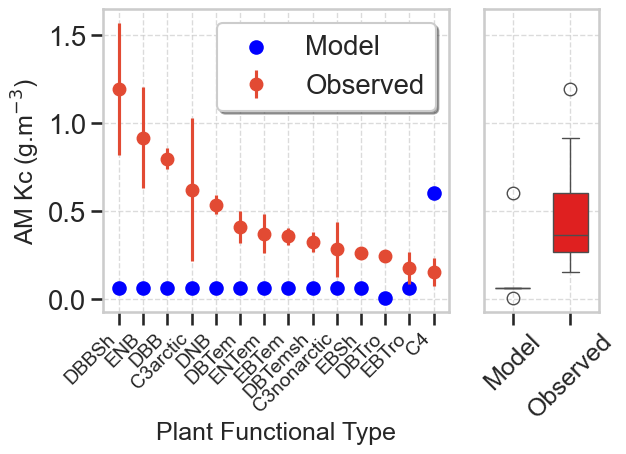

[0.09471428571428572, 0.4742505118190273]
[0.1408253368900784, 0.2951817100769902]


In [328]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Improved style settings for a professional look
plt.style.use('seaborn-whitegrid')
sns.set_context("talk", font_scale=1.2)

# Your data
pft_name = [
    "not_vegetated",
    "needleleaf_evergreen_temperate_tree",
    "needleleaf_evergreen_boreal_tree",
    "needleleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_tropical_tree",
    "broadleaf_evergreen_temperate_tree",
    "broadleaf_deciduous_tropical_tree",
    "broadleaf_deciduous_temperate_tree",
    "broadleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_shrub",
    "broadleaf_deciduous_temperate_shrub",
    "broadleaf_deciduous_boreal_shrub",
    "c3_arctic_grass",
    "c3_non-arctic_grass",
    "c4_grass"
]

# Your data
pft_abb = [
    'ENTem', 'ENB', 'DNB', 'EBTro', 'EBTem', 'DBTro', 'DBTem', 
    'DBB', 'EBSh', 'DBTemsh', 'DBBSh', 
    'C3arctic', 'C3nonarctic', 'C4'
]

# Define the list of names
my_xticks = pft_abb


# Sort average_costs in descending order and keep track of the indices to sort other arrays
sorted_indices = np.argsort(average_costs[1:15])[::-1]  # [1:15] to match your original slicing
sorted_average_costs = np.array(average_costs[1:15])[sorted_indices]
sorted_stds= np.array(std_devs[1:15])[sorted_indices]
sorted_ci_95s = np.array(ci_95s[1:15])[sorted_indices]


# Calculate lower and upper errors
lower_error = sorted_average_costs - sorted_ci_95s[:, 0]
upper_error = sorted_ci_95s[:, 1] - sorted_average_costs

# Combine lower and upper errors into a single array for plotting
sorted_error1 = upper_error
sorted_error2 = sorted_stds


# Sort other arrays based on sorted indices
sorted_pft_abb = np.array(pft_abb)[sorted_indices]
#sorted_error = np.array(error[1:15])[sorted_indices]
sorted_perecm = np.array(perecm[1:15])[sorted_indices]

# Define the x-axis values
x = np.arange(len(sorted_pft_abb))

# Create a figure and a set of subplots
fig, ax = plt.subplots()
gs = GridSpec(1, 2, width_ratios=[3, 1], wspace=0.15)  # Adjusted spacing between plots


# Calculate the error for each PFT (ci_95[1] - average_costs)
#error = [ci[1] - avg for ci, avg in zip(ci_95s, average_costs)]
# Create the scatter and error bar plot
ax1 = plt.subplot(gs[0])
# Plot the data with error bars
ax1.errorbar(x, sorted_average_costs, yerr=sorted_error1, fmt='o', label='Observed')
ax1.scatter(x, sorted_perecm, label='Model', color='blue')

# Set the x-axis labels and rotate them 45 degrees
ax1.set_xticks(x)
ax1.set_xticklabels(sorted_pft_abb, rotation=45, ha='right', fontsize=14)

# Add a legend
ax1.legend(loc='best', frameon=True, shadow=True)

# Add grid
ax1.grid(True, linestyle='--', linewidth=1, alpha=0.7)

# Add labels and title
ax1.set_xlabel('Plant Functional Type', fontsize=18)
ax1.set_ylabel(r'AM Kc (g.m$^{-3}$)', fontsize=18)
#ax.set_title('Fungal Cost per PFT', fontsize=16)

# Create the box plot in the adjacent subplot
ax2 = plt.subplot(gs[1], sharey=ax1)  # Share y-axis with ax1
sns.boxplot(data=[sorted_perecm, sorted_average_costs], ax=ax2, width=0.6, palette=['blue', 'red'])
ax2.set_xticklabels(['Model', 'Observed'], rotation=45,fontsize=18)
#ax2.set_title('Comparison of CLM and Observed', fontsize=14)
ax2.set_ylabel('')  # Remove y-axis label to avoid redundancy


# Hide y-axis ticks and labels for ax2
ax2.tick_params(axis='y', which='both', left=False, labelleft=False)
# Add grid
ax2.grid(True, linestyle='--', linewidth=1, alpha=0.7)

# Adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

plt.tight_layout()

plt.savefig("akc_pft_v2.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Calculate means and standard deviations
means = [np.mean(sorted_perecm), np.mean(sorted_average_costs)]
stds = [np.std(sorted_perecm), np.std(sorted_average_costs)]

print(means)
print(stds)

/var/folders/w_/lxh510q93ln6zrtpz0_ktmq80000gn/T/ipykernel_93535/4147154663.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Model', 'Observed'], fontsize=26)
/var/folders/w_/lxh510q93ln6zrtpz0_ktmq80000gn/T/ipykernel_93535/4147154663.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


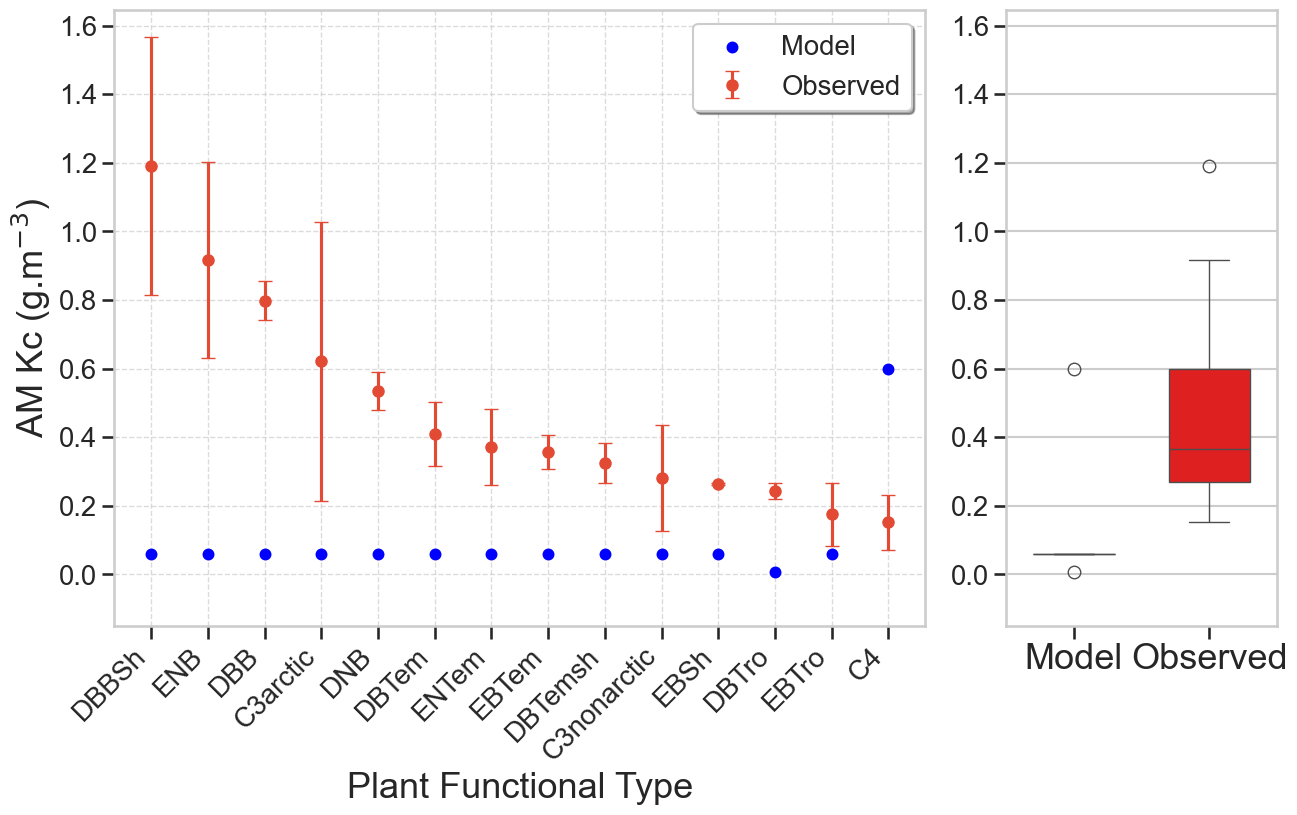

In [329]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Improved style settings for a professional look
plt.style.use('seaborn-whitegrid')
sns.set_context("talk", font_scale=1.2)

# Your data
# ...

# Abbreviations, sorting, and data preparation
# ...

# Create a figure with GridSpec for custom layout
fig = plt.figure(figsize=(15, 8))  # Adjusted size to accommodate both plots
gs = GridSpec(1, 2, width_ratios=[3, 1], wspace=0.15)  # Adjusted spacing between plots

# Create the scatter and error bar plot
ax1 = plt.subplot(gs[0])
ax1.errorbar(x, sorted_average_costs, yerr=sorted_error1, fmt='o', label='Observed', markersize=8, capsize=5)
ax1.scatter(x, sorted_perecm, label='Model', color='blue', s=50)
ax1.set_xticks(x)
ax1.set_xticklabels(sorted_pft_abb, rotation=45, ha='right', fontsize=20)
ax1.set_xlabel('Plant Functional Type', fontsize=26)
ax1.set_ylabel(r'AM Kc (g.m$^{-3}$)', fontsize=26)
ax1.legend(loc='best', frameon=True, shadow=True)

#ax1.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)
ax1.grid(True, linestyle='--', linewidth=1, alpha=0.7)

# Create the box plot in the adjacent subplot
ax2 = plt.subplot(gs[1], sharey=ax1)  # Share y-axis with ax1
sns.boxplot(data=[sorted_perecm, sorted_average_costs], ax=ax2, width=0.6, palette=['blue', 'red'])
ax2.set_xticklabels(['Model', 'Observed'], fontsize=26)
#ax2.set_title('Comparison of CLM and Observed', fontsize=14)
ax2.set_ylabel('')  # Remove y-axis label to avoid redundancy


# Synchronize y-axis limits if needed
ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(bottom=-0.15, top=ylim)
ax2.set_ylim(bottom=-0.15, top=ylim)


plt.tight_layout()

plt.savefig("akc_pft_combined_v2.png", dpi=300, bbox_inches='tight')  # Ensure no clipping

# Show the plot
plt.show()

Calculate EcM Kc

In [330]:
#Get CLM vars
surf = Dataset('/Users/braghiere/Documents/Working_papers/FUN_cost_parameters/CLM/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr1850_c190304.nc','r')
perecm = params.variables['ekc_active'][:]
pft_map_nat = surf.variables['PCT_NAT_PFT'][:]

#Get observed vars
ekc_igbp = Dataset('/Users/braghiere/Documents/Working_papers/FUN_cost_parameters/k_params/kc_ecm_soilgrids_0-100cm_144x96.nc','r')
v1 = ekc_igbp.variables['Band1'][:]


In [331]:
import numpy as np
import scipy.stats as stats

def calculate_stats_per_pft(fungal_costs, pft_map):
    # Get the number of PFTs
    num_pfts = pft_map.shape[0]

    # Prepare arrays to hold the total weighted costs and total weights for each PFT
    total_costs = np.zeros(num_pfts)
    total_weights = np.zeros(num_pfts)

    # Prepare lists to hold all the weighted costs for each PFT
    all_costs = [[] for _ in range(num_pfts)]

    # Iterate over the map
    for k in range(num_pfts):
        for i in range(pft_map.shape[1]):
            for j in range(pft_map.shape[2]):
                # Get the fungal cost for this cell
                cost = fungal_costs[i, j]

                # Get the PFT weight for this cell
                weight = pft_map[k, i, j]

                # Update the total cost and total weight for this PFT
                total_costs[k] += cost * weight
                total_weights[k] += weight

                # Add the weighted cost to the list for this PFT
                all_costs[k].append(cost * weight/100)

    # Calculate the average cost for each PFT
    average_costs = total_costs / total_weights

    # Calculate the variance, standard deviation, and 95% confidence interval for each PFT
    variances = [np.var(costs) for costs in all_costs]
    std_devs = [np.std(costs) for costs in all_costs]
    ci_95s = [stats.norm.interval(0.95, loc=mean, scale=std_dev) for mean, std_dev in zip(average_costs, std_devs)]

    return average_costs, variances, std_devs, ci_95s

fungal_costs = v1
pft_map = pft_map_nat

# Use the function
average_costs, variances, std_devs, ci_95s = calculate_stats_per_pft(fungal_costs, pft_map)

# Print the results
for i in range(len(pft_name)):
    print(f'Stats for PFT {pft_name[i]}:')
    print(f'  Average cost: {average_costs[i]}')
    print(f'  Variance: {variances[i]}')
    print(f'  Standard Deviation: {std_devs[i]}')
    print(f'  95% Confidence Interval: {ci_95s[i]}')


Stats for PFT not_vegetated:
  Average cost: 0.009347568222584713
  Variance: 0.0016890571786543204
  Standard Deviation: 0.041098140817491004
  95% Confidence Interval: (-0.07120330761125318, 0.08989844405642261)
Stats for PFT needleleaf_evergreen_temperate_tree:
  Average cost: 0.056568757469792716
  Variance: 8.748714045168981e-05
  Standard Deviation: 0.009353456069907519
  95% Confidence Interval: (0.03823632044179642, 0.07490119449778901)
Stats for PFT needleleaf_evergreen_boreal_tree:
  Average cost: 0.018657866467197734
  Variance: 2.04268446342042e-05
  Standard Deviation: 0.004519606690211462
  95% Confidence Interval: (0.009799600130096993, 0.027516132804298474)
Stats for PFT needleleaf_deciduous_boreal_tree:
  Average cost: 0.002325667401934003
  Variance: 1.8572238564687673e-07
  Standard Deviation: 0.0004309552014384752
  95% Confidence Interval: (0.0014810107281643876, 0.0031703240757036183)
Stats for PFT broadleaf_evergreen_tropical_tree:
  Average cost: 0.0912703666434

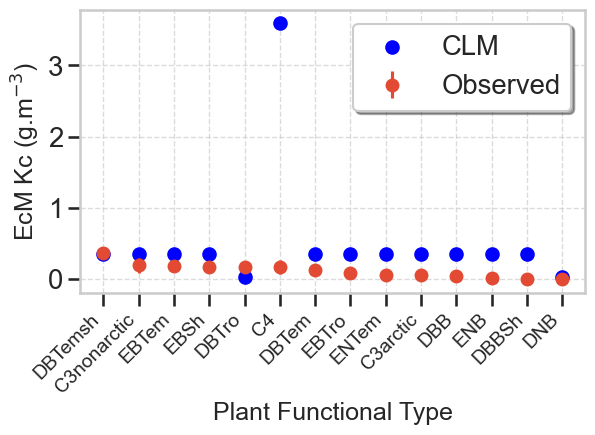

In [332]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Improved style settings for a professional look
plt.style.use('seaborn-whitegrid')
sns.set_context("talk", font_scale=1.2)

# Your data
pft_name = [
    "not_vegetated",
    "needleleaf_evergreen_temperate_tree",
    "needleleaf_evergreen_boreal_tree",
    "needleleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_tropical_tree",
    "broadleaf_evergreen_temperate_tree",
    "broadleaf_deciduous_tropical_tree",
    "broadleaf_deciduous_temperate_tree",
    "broadleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_shrub",
    "broadleaf_deciduous_temperate_shrub",
    "broadleaf_deciduous_boreal_shrub",
    "c3_arctic_grass",
    "c3_non-arctic_grass",
    "c4_grass"
]

# Your data
pft_abb = [
    'ENTem', 'ENB', 'DNB', 'EBTro', 'EBTem', 'DBTro', 'DBTem', 
    'DBB', 'EBSh', 'DBTemsh', 'DBBSh', 
    'C3arctic', 'C3nonarctic', 'C4'
]

# Define the list of names
my_xticks = pft_abb

# Sort average_costs in descending order and keep track of the indices to sort other arrays
sorted_indices = np.argsort(average_costs[1:15])[::-1]  # [1:15] to match your original slicing
sorted_average_costs = np.array(average_costs[1:15])[sorted_indices]
sorted_stds= np.array(std_devs[1:15])[sorted_indices]
sorted_ci_95s = np.array(ci_95s[1:15])[sorted_indices]


# Calculate lower and upper errors
lower_error = sorted_average_costs - sorted_ci_95s[:, 0]
upper_error = sorted_ci_95s[:, 1] - sorted_average_costs

# Combine lower and upper errors into a single array for plotting
sorted_error1 = upper_error
sorted_error2 = sorted_stds


# Sort other arrays based on sorted indices
sorted_pft_abb = np.array(pft_abb)[sorted_indices]
#sorted_error = np.array(error[1:15])[sorted_indices]
sorted_perecm = np.array(perecm[1:15])[sorted_indices]

# Define the x-axis values
x = np.arange(len(sorted_pft_abb))

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Calculate the error for each PFT (ci_95[1] - average_costs)
#error = [ci[1] - avg for ci, avg in zip(ci_95s, average_costs)]

# Plot the data with error bars
ax.errorbar(x, sorted_average_costs, yerr=sorted_error1, fmt='o', label='Observed')
ax.scatter(x, sorted_perecm, label='CLM', color='blue')


# Set the x-axis labels and rotate them 45 degrees
ax.set_xticks(x)
ax.set_xticklabels(sorted_pft_abb, rotation=45, ha='right', fontsize=14)

# Add a legend
ax.legend(loc='best', frameon=True, shadow=True)

# Add grid
ax.grid(True, linestyle='--', linewidth=1, alpha=0.7)

# Add labels and title
ax.set_xlabel('Plant Functional Type', fontsize=18)
ax.set_ylabel(r'EcM Kc (g.m$^{-3}$)', fontsize=18)
#ax.set_title('Fungal Cost per PFT', fontsize=16)

# Adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

plt.tight_layout()

plt.savefig("ekc_pft.png", dpi=300)

# Show the plot
plt.show()


/var/folders/w_/lxh510q93ln6zrtpz0_ktmq80000gn/T/ipykernel_93535/4238435816.py:100: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Model', 'Observed'], rotation=45,fontsize=18)
/var/folders/w_/lxh510q93ln6zrtpz0_ktmq80000gn/T/ipykernel_93535/4238435816.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


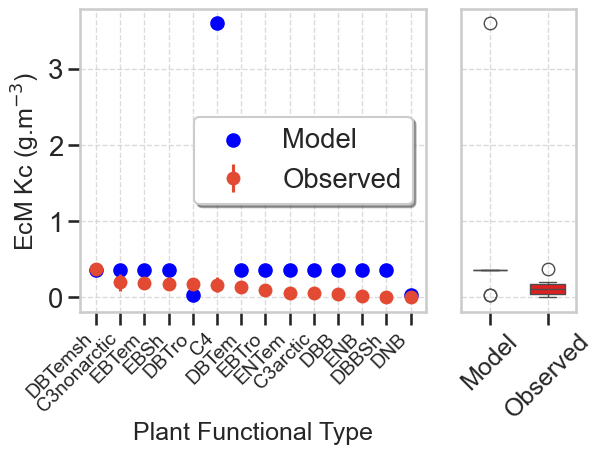

[0.5451428571428572, 0.11960389706355487]
[0.8547205773269542, 0.09711531981190527]


In [333]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Improved style settings for a professional look
plt.style.use('seaborn-whitegrid')
sns.set_context("talk", font_scale=1.2)

# Your data
pft_name = [
    "not_vegetated",
    "needleleaf_evergreen_temperate_tree",
    "needleleaf_evergreen_boreal_tree",
    "needleleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_tropical_tree",
    "broadleaf_evergreen_temperate_tree",
    "broadleaf_deciduous_tropical_tree",
    "broadleaf_deciduous_temperate_tree",
    "broadleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_shrub",
    "broadleaf_deciduous_temperate_shrub",
    "broadleaf_deciduous_boreal_shrub",
    "c3_arctic_grass",
    "c3_non-arctic_grass",
    "c4_grass"
]

# Your data
pft_abb = [
    'ENTem', 'ENB', 'DNB', 'EBTro', 'EBTem', 'DBTro', 'DBTem', 
    'DBB', 'EBSh', 'DBTemsh', 'DBBSh', 
    'C3arctic', 'C3nonarctic', 'C4'
]

# Define the list of names
my_xticks = pft_abb

# Sort average_costs in descending order and keep track of the indices to sort other arrays
sorted_indices = np.argsort(average_costs[1:15])[::-1]  # [1:15] to match your original slicing
sorted_average_costs = np.array(average_costs[1:15])[sorted_indices]
sorted_stds= np.array(std_devs[1:15])[sorted_indices]
sorted_ci_95s = np.array(ci_95s[1:15])[sorted_indices]


# Calculate lower and upper errors
lower_error = sorted_average_costs - sorted_ci_95s[:, 0]
upper_error = sorted_ci_95s[:, 1] - sorted_average_costs

# Combine lower and upper errors into a single array for plotting
sorted_error1 = upper_error
sorted_error2 = sorted_stds


# Sort other arrays based on sorted indices
sorted_pft_abb = np.array(pft_abb)[sorted_indices]
#sorted_error = np.array(error[1:15])[sorted_indices]
sorted_perecm = np.array(perecm[1:15])[sorted_indices]

# Define the x-axis values
x = np.arange(len(sorted_pft_abb))

# Create a figure and a set of subplots
fig, ax = plt.subplots()
gs = GridSpec(1, 2, width_ratios=[3, 1], wspace=0.15)  # Adjusted spacing between plots


# Calculate the error for each PFT (ci_95[1] - average_costs)
#error = [ci[1] - avg for ci, avg in zip(ci_95s, average_costs)]
# Create the scatter and error bar plot
ax1 = plt.subplot(gs[0])

# Calculate the error for each PFT (ci_95[1] - average_costs)
#error = [ci[1] - avg for ci, avg in zip(ci_95s, average_costs)]

# Plot the data with error bars
ax1.errorbar(x, sorted_average_costs, yerr=sorted_error1, fmt='o', label='Observed')
ax1.scatter(x, sorted_perecm, label='Model', color='blue')


# Set the x-axis labels and rotate them 45 degrees
ax1.set_xticks(x)
ax1.set_xticklabels(sorted_pft_abb, rotation=45, ha='right', fontsize=14)

# Add a legend
#ax1.legend(loc='best', frameon=True, shadow=True, ncol=1)
ax1.legend(loc='center right', frameon=True, shadow=True, ncol=1)


# Add grid
ax1.grid(True, linestyle='--', linewidth=1, alpha=0.7)

# Add labels and title
ax1.set_xlabel('Plant Functional Type', fontsize=18)
ax1.set_ylabel(r'EcM Kc (g.m$^{-3}$)', fontsize=18)
#ax.set_title('Fungal Cost per PFT', fontsize=16)

# Create the box plot in the adjacent subplot
ax2 = plt.subplot(gs[1], sharey=ax1)  # Share y-axis with ax1
sns.boxplot(data=[sorted_perecm, sorted_average_costs], ax=ax2, width=0.6, palette=['blue', 'red'])
ax2.set_xticklabels(['Model', 'Observed'], rotation=45,fontsize=18)
#ax2.set_title('Comparison of CLM and Observed', fontsize=14)
ax2.set_ylabel('')  # Remove y-axis label to avoid redundancy


# Hide y-axis ticks and labels for ax2
ax2.tick_params(axis='y', which='both', left=False, labelleft=False)
# Add grid
ax2.grid(True, linestyle='--', linewidth=1, alpha=0.7)

# Adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

plt.tight_layout()

plt.savefig("ekc_pft_v2.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Calculate means and standard deviations
means = [np.mean(sorted_perecm), np.mean(sorted_average_costs)]
stds = [np.std(sorted_perecm), np.std(sorted_average_costs)]

print(means)
print(stds)




/var/folders/w_/lxh510q93ln6zrtpz0_ktmq80000gn/T/ipykernel_93535/2838769474.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['CLM', 'Observed'], fontsize=24)
/var/folders/w_/lxh510q93ln6zrtpz0_ktmq80000gn/T/ipykernel_93535/2838769474.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


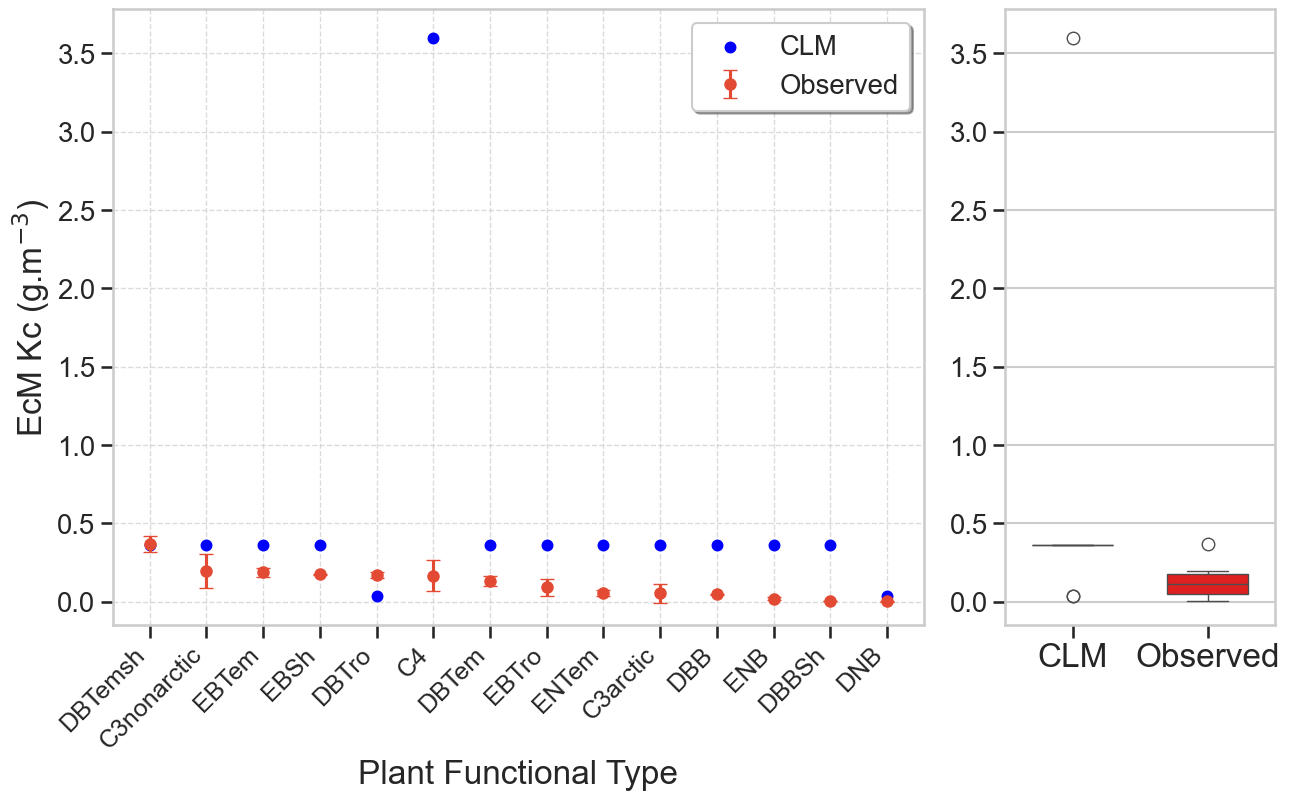

In [334]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Improved style settings for a professional look
plt.style.use('seaborn-whitegrid')
sns.set_context("talk", font_scale=1.2)

# Your data
# ...

# Abbreviations, sorting, and data preparation
# ...

# Create a figure with GridSpec for custom layout
fig = plt.figure(figsize=(15, 8))  # Adjusted size to accommodate both plots
gs = GridSpec(1, 2, width_ratios=[3, 1], wspace=0.15)  # Adjusted spacing between plots

# Create the scatter and error bar plot
ax1 = plt.subplot(gs[0])
ax1.errorbar(x, sorted_average_costs, yerr=sorted_error1, fmt='o', label='Observed', markersize=8, capsize=5)
ax1.scatter(x, sorted_perecm, label='CLM', color='blue', s=50)
ax1.set_xticks(x)
ax1.set_xticklabels(sorted_pft_abb, rotation=45, ha='right', fontsize=18)
ax1.set_xlabel('Plant Functional Type', fontsize=24)
ax1.set_ylabel(r'EcM Kc (g.m$^{-3}$)', fontsize=24)
ax1.legend(loc='best', frameon=True, shadow=True)

#ax1.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)
ax1.grid(True, linestyle='--', linewidth=1, alpha=0.7)

# Create the box plot in the adjacent subplot
ax2 = plt.subplot(gs[1], sharey=ax1)  # Share y-axis with ax1
sns.boxplot(data=[sorted_perecm, sorted_average_costs], ax=ax2, width=0.6, palette=['blue', 'red'])
ax2.set_xticklabels(['CLM', 'Observed'], fontsize=24)
#ax2.set_title('Comparison of CLM and Observed', fontsize=14)
ax2.set_ylabel('')  # Remove y-axis label to avoid redundancy

# Synchronize y-axis limits if needed
ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(bottom=-0.15, top=ylim)
ax2.set_ylim(bottom=-0.15, top=ylim)

plt.tight_layout()

plt.savefig("ekc_pft_combined.png", dpi=300, bbox_inches='tight')  # Ensure no clipping

# Show the plot
plt.show()

Calculate AM Kn

In [335]:
#Get CLM vars
surf = Dataset('/Users/braghiere/Documents/Working_papers/FUN_cost_parameters/CLM/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr1850_c190304.nc','r')
perecm = params.variables['akn_active'][:]
pft_map_nat = surf.variables['PCT_NAT_PFT'][:]

#Get observed vars
ekc_igbp = Dataset('/Users/braghiere/Documents/Working_papers/FUN_cost_parameters/k_params/kn_am_soilgrids_0-100cm_144x96_zeros.nc','r')
v1 = ekc_igbp.variables['Band1'][:]


In [336]:
import numpy as np
import scipy.stats as stats

def calculate_stats_per_pft(fungal_costs, pft_map):
    # Get the number of PFTs
    num_pfts = pft_map.shape[0]

    # Prepare arrays to hold the total weighted costs and total weights for each PFT
    total_costs = np.zeros(num_pfts)
    total_weights = np.zeros(num_pfts)

    # Prepare lists to hold all the weighted costs for each PFT
    all_costs = [[] for _ in range(num_pfts)]

    # Iterate over the map
    for k in range(num_pfts):
        for i in range(pft_map.shape[1]):
            for j in range(pft_map.shape[2]):
                # Get the fungal cost for this cell
                cost = fungal_costs[i, j]

                # Get the PFT weight for this cell
                weight = pft_map[k, i, j]

                # Update the total cost and total weight for this PFT
                total_costs[k] += cost * weight
                total_weights[k] += weight

                # Add the weighted cost to the list for this PFT
                all_costs[k].append(cost * weight/100)

    # Calculate the average cost for each PFT
    average_costs = total_costs / total_weights

    # Calculate the variance, standard deviation, and 95% confidence interval for each PFT
    variances = [np.var(costs) for costs in all_costs]
    std_devs = [np.std(costs) for costs in all_costs]
    ci_95s = [stats.norm.interval(0.95, loc=mean, scale=std_dev) for mean, std_dev in zip(average_costs, std_devs)]

    return average_costs, variances, std_devs, ci_95s

fungal_costs = v1
pft_map = pft_map_nat

# Use the function
average_costs, variances, std_devs, ci_95s = calculate_stats_per_pft(fungal_costs, pft_map)

# Print the results
for i in range(len(pft_name)):
    print(f'Stats for PFT {pft_name[i]}:')
    print(f'  Average cost: {average_costs[i]}')
    print(f'  Variance: {variances[i]}')
    print(f'  Standard Deviation: {std_devs[i]}')
    print(f'  95% Confidence Interval: {ci_95s[i]}')


Stats for PFT not_vegetated:
  Average cost: 0.0001303290341855561
  Variance: 2.01340612036348e-07
  Standard Deviation: 0.0004487099419851849
  95% Confidence Interval: (-0.0007491262916104633, 0.0010097843599815755)
Stats for PFT needleleaf_evergreen_temperate_tree:
  Average cost: 0.0005407929607633618
  Variance: 2.9602083358632604e-09
  Standard Deviation: 5.440779664591519e-05
  95% Confidence Interval: (0.00043415563885918884, 0.0006474302826675347)
Stats for PFT needleleaf_evergreen_boreal_tree:
  Average cost: 0.00044683486112551753
  Variance: 2.455924128676776e-09
  Standard Deviation: 4.955728128818989e-05
  95% Confidence Interval: (0.0003497043746289446, 0.0005439653476220905)
Stats for PFT needleleaf_deciduous_boreal_tree:
  Average cost: 0.0004713954004625989
  Variance: 6.78686075949265e-10
  Standard Deviation: 2.6051604095511375e-05
  95% Confidence Interval: (0.00042033519469590044, 0.0005224556062292974)
Stats for PFT broadleaf_evergreen_tropical_tree:
  Average c

[3.36623562e-04 1.12776306e-04 6.01630328e-04 8.38821917e-06
 3.02589780e-04 3.19181238e-04 6.52188897e-05 9.65757048e-05
 1.06637322e-04 5.10602058e-05 9.71304865e-05 2.35876556e-05
 6.75426909e-05 1.04450160e-04]


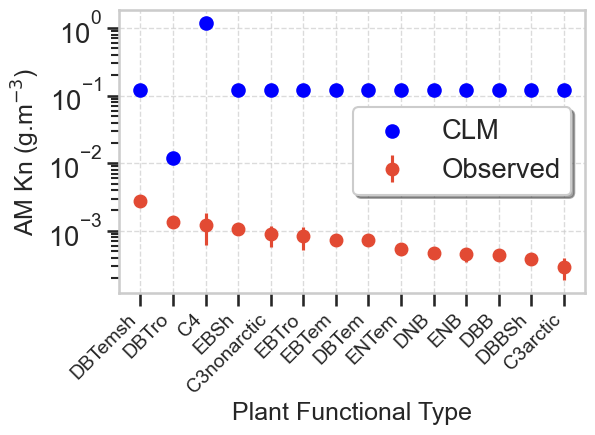

In [337]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Improved style settings for a professional look
plt.style.use('seaborn-whitegrid')
sns.set_context("talk", font_scale=1.2)

# Your data
pft_name = [
    "not_vegetated",
    "needleleaf_evergreen_temperate_tree",
    "needleleaf_evergreen_boreal_tree",
    "needleleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_tropical_tree",
    "broadleaf_evergreen_temperate_tree",
    "broadleaf_deciduous_tropical_tree",
    "broadleaf_deciduous_temperate_tree",
    "broadleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_shrub",
    "broadleaf_deciduous_temperate_shrub",
    "broadleaf_deciduous_boreal_shrub",
    "c3_arctic_grass",
    "c3_non-arctic_grass",
    "c4_grass"
]

# Your data
pft_abb = [
    'ENTem', 'ENB', 'DNB', 'EBTro', 'EBTem', 'DBTro', 'DBTem', 
    'DBB', 'EBSh', 'DBTemsh', 'DBBSh', 
    'C3arctic', 'C3nonarctic', 'C4'
]

# Define the list of names
my_xticks = pft_abb


# Sort average_costs in descending order and keep track of the indices to sort other arrays
sorted_indices = np.argsort(average_costs[1:15])[::-1]  # [1:15] to match your original slicing
sorted_average_costs = np.array(average_costs[1:15])[sorted_indices]
sorted_stds= np.array(std_devs[1:15])[sorted_indices]
sorted_ci_95s = np.array(ci_95s[1:15])[sorted_indices]


# Calculate lower and upper errors
lower_error = sorted_average_costs - sorted_ci_95s[:, 0]
upper_error = sorted_ci_95s[:, 1] - sorted_average_costs

# Combine lower and upper errors into a single array for plotting
sorted_error1 = upper_error
sorted_error2 = sorted_stds

# Sort other arrays based on sorted indices
sorted_pft_abb = np.array(pft_abb)[sorted_indices]
#sorted_error = np.array(error[1:15])[sorted_indices]
sorted_perecm = np.array(perecm[1:15])[sorted_indices]


# Define the x-axis values
x = np.arange(len(sorted_pft_abb))

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Calculate the error for each PFT (ci_95[1] - average_costs)
error = [ci[1] - avg for ci, avg in zip(ci_95s, average_costs)]

# Plot the data with error bars
ax.errorbar(x, sorted_average_costs, yerr=sorted_error1, fmt='o', label='Observed')
ax.scatter(x, sorted_perecm, label='CLM', color='blue')

print(sorted_error1)
# Set the x-axis labels and rotate them 45 degrees
ax.set_xticks(x)
ax.set_xticklabels(sorted_pft_abb, rotation=45, ha='right', fontsize=14)

# Add a legend
ax.legend(loc='best', frameon=True, shadow=True)

# Add grid
ax.grid(True, linestyle='--', linewidth=1, alpha=0.7)

# Add labels and title
ax.set_xlabel('Plant Functional Type', fontsize=18)
ax.set_ylabel(r'AM Kn (g.m$^{-3}$)', fontsize=18)
#ax.set_title('Fungal Cost per PFT', fontsize=16)

# Set the y-axis to logarithmic scale
ax.set_yscale('log')

# Adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

plt.tight_layout()

plt.savefig("akn_pft.png", dpi=300)

# Show the plot
plt.show()


[3.36623562e-04 1.12776306e-04 6.01630328e-04 8.38821917e-06
 3.02589780e-04 3.19181238e-04 6.52188897e-05 9.65757048e-05
 1.06637322e-04 5.10602058e-05 9.71304865e-05 2.35876556e-05
 6.75426909e-05 1.04450160e-04]


/var/folders/w_/lxh510q93ln6zrtpz0_ktmq80000gn/T/ipykernel_93535/2236389429.py:100: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Model', 'Observed'], rotation=45,fontsize=18)
/var/folders/w_/lxh510q93ln6zrtpz0_ktmq80000gn/T/ipykernel_93535/2236389429.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


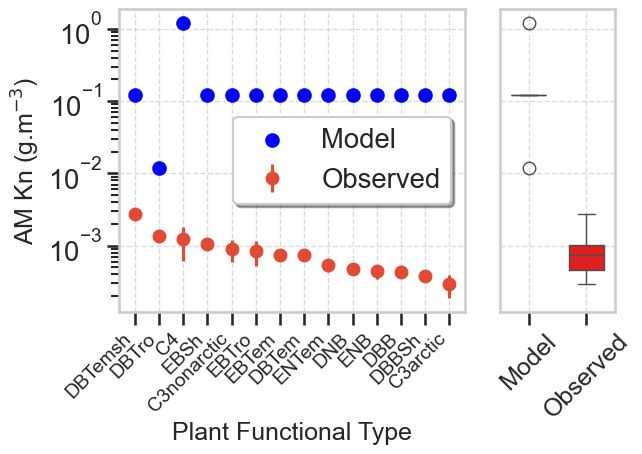

[0.18942857142857147, 0.0008672640071611448]
[0.28165067378015674, 0.0006067803369154798]


In [338]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Improved style settings for a professional look
plt.style.use('seaborn-whitegrid')
sns.set_context("talk", font_scale=1.2)

# Your data
pft_name = [
    "not_vegetated",
    "needleleaf_evergreen_temperate_tree",
    "needleleaf_evergreen_boreal_tree",
    "needleleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_tropical_tree",
    "broadleaf_evergreen_temperate_tree",
    "broadleaf_deciduous_tropical_tree",
    "broadleaf_deciduous_temperate_tree",
    "broadleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_shrub",
    "broadleaf_deciduous_temperate_shrub",
    "broadleaf_deciduous_boreal_shrub",
    "c3_arctic_grass",
    "c3_non-arctic_grass",
    "c4_grass"
]

# Your data
pft_abb = [
    'ENTem', 'ENB', 'DNB', 'EBTro', 'EBTem', 'DBTro', 'DBTem', 
    'DBB', 'EBSh', 'DBTemsh', 'DBBSh', 
    'C3arctic', 'C3nonarctic', 'C4'
]

# Define the list of names
my_xticks = pft_abb


# Sort average_costs in descending order and keep track of the indices to sort other arrays
sorted_indices = np.argsort(average_costs[1:15])[::-1]  # [1:15] to match your original slicing
sorted_average_costs = np.array(average_costs[1:15])[sorted_indices]
sorted_stds= np.array(std_devs[1:15])[sorted_indices]
sorted_ci_95s = np.array(ci_95s[1:15])[sorted_indices]


# Calculate lower and upper errors
lower_error = sorted_average_costs - sorted_ci_95s[:, 0]
upper_error = sorted_ci_95s[:, 1] - sorted_average_costs

# Combine lower and upper errors into a single array for plotting
sorted_error1 = upper_error
sorted_error2 = sorted_stds

# Sort other arrays based on sorted indices
sorted_pft_abb = np.array(pft_abb)[sorted_indices]
#sorted_error = np.array(error[1:15])[sorted_indices]
sorted_perecm = np.array(perecm[1:15])[sorted_indices]


# Define the x-axis values
x = np.arange(len(sorted_pft_abb))

# Create a figure and a set of subplots
fig, ax = plt.subplots()
gs = GridSpec(1, 2, width_ratios=[3, 1], wspace=0.15)  # Adjusted spacing between plots

# Create the scatter and error bar plot
ax1 = plt.subplot(gs[0])

# Calculate the error for each PFT (ci_95[1] - average_costs)
error = [ci[1] - avg for ci, avg in zip(ci_95s, average_costs)]

# Plot the data with error bars
ax1.errorbar(x, sorted_average_costs, yerr=sorted_error1, fmt='o', label='Observed')
ax1.scatter(x, sorted_perecm, label='Model', color='blue')

print(sorted_error1)
# Set the x-axis labels and rotate them 45 degrees
ax1.set_xticks(x)
ax1.set_xticklabels(sorted_pft_abb, rotation=45, ha='right', fontsize=14)

# Add a legend
ax1.legend(loc='best', frameon=True, shadow=True)

# Add grid
ax1.grid(True, linestyle='--', linewidth=1, alpha=0.7)

# Add labels and title
ax1.set_xlabel('Plant Functional Type', fontsize=18)
ax1.set_ylabel(r'AM Kn (g.m$^{-3}$)', fontsize=18)
#ax.set_title('Fungal Cost per PFT', fontsize=16)

# Set the y-axis to logarithmic scale
ax1.set_yscale('log')


# Create the box plot in the adjacent subplot
ax2 = plt.subplot(gs[1], sharey=ax1)  # Share y-axis with ax1
sns.boxplot(data=[sorted_perecm, sorted_average_costs], ax=ax2, width=0.6, palette=['blue', 'red'])
ax2.set_xticklabels(['Model', 'Observed'], rotation=45,fontsize=18)
#ax2.set_title('Comparison of CLM and Observed', fontsize=14)
ax2.set_ylabel('')  # Remove y-axis label to avoid redundancy


# Hide y-axis ticks and labels for ax2
ax2.tick_params(axis='y', which='both', left=False, labelleft=False)
# Add grid
ax2.grid(True, linestyle='--', linewidth=1, alpha=0.7)

# Adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

plt.tight_layout()

plt.savefig("akn_pft_v2.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Calculate means and standard deviations
means = [np.mean(sorted_perecm), np.mean(sorted_average_costs)]
stds = [np.std(sorted_perecm), np.std(sorted_average_costs)]

print(means)
print(stds)


/var/folders/w_/lxh510q93ln6zrtpz0_ktmq80000gn/T/ipykernel_93535/2879573002.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['CLM', 'Observed'], fontsize=24)
/var/folders/w_/lxh510q93ln6zrtpz0_ktmq80000gn/T/ipykernel_93535/2879573002.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


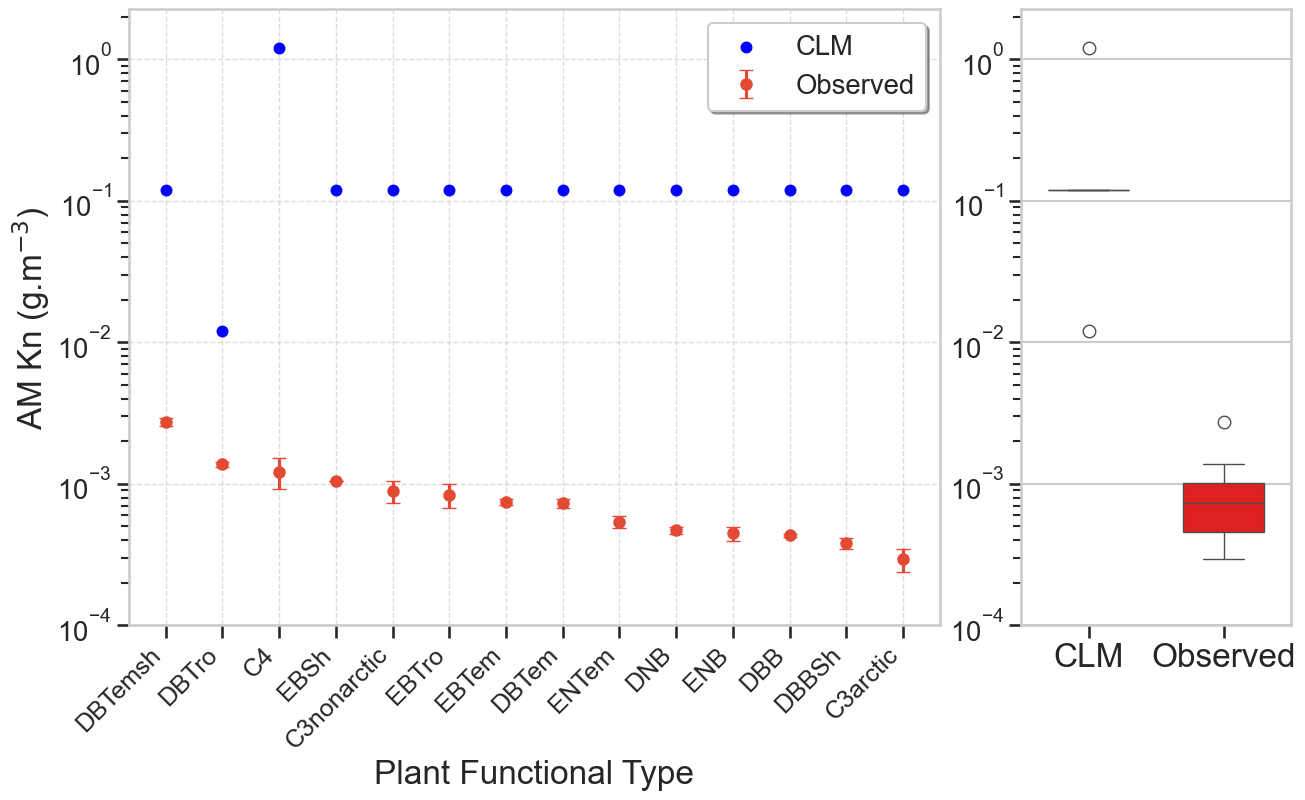

In [339]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Improved style settings for a professional look
plt.style.use('seaborn-whitegrid')
sns.set_context("talk", font_scale=1.2)

# Your data
# ...

# Abbreviations, sorting, and data preparation
# ...

# Create a figure with GridSpec for custom layout
fig = plt.figure(figsize=(15, 8))  # Adjusted size to accommodate both plots
gs = GridSpec(1, 2, width_ratios=[3, 1], wspace=0.15)  # Adjusted spacing between plots

# Create the scatter and error bar plot
ax1 = plt.subplot(gs[0])
ax1.errorbar(x, sorted_average_costs, yerr=sorted_error2, fmt='o', label='Observed', markersize=8, capsize=5)
ax1.scatter(x, sorted_perecm, label='CLM', color='blue', s=50)
ax1.set_xticks(x)
ax1.set_xticklabels(sorted_pft_abb, rotation=45, ha='right', fontsize=18)
ax1.set_xlabel('Plant Functional Type', fontsize=24)
ax1.set_ylabel(r'AM Kn (g.m$^{-3}$)', fontsize=24)
ax1.legend(loc='best', frameon=True, shadow=True)

#ax1.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)
ax1.grid(True, linestyle='--', linewidth=1, alpha=0.7)

# Create the box plot in the adjacent subplot
ax2 = plt.subplot(gs[1], sharey=ax1)  # Share y-axis with ax1
sns.boxplot(data=[sorted_perecm, sorted_average_costs], ax=ax2, width=0.6, palette=['blue', 'red'])
ax2.set_xticklabels(['CLM', 'Observed'], fontsize=24)
#ax2.set_title('Comparison of CLM and Observed', fontsize=14)
ax2.set_ylabel('')  # Remove y-axis label to avoid redundancy

# Synchronize y-axis limits if needed
ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(bottom=1e-4, top=ylim+1e0)
ax2.set_ylim(bottom=1e-4, top=ylim+1e0)

# Set the y-axis to logarithmic scale
ax1.set_yscale('log')
ax2.set_yscale('log')

plt.tight_layout()

plt.savefig("akn_pft_combined.png", dpi=300, bbox_inches='tight')  # Ensure no clipping

# Show the plot
plt.show()

Calculate EcM Kn

In [340]:
#Get CLM vars
surf = Dataset('/Users/braghiere/Documents/Working_papers/FUN_cost_parameters/CLM/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr1850_c190304.nc','r')
perecm = params.variables['ekn_active'][:]
pft_map_nat = surf.variables['PCT_NAT_PFT'][:]

#Get observed vars
ekc_igbp = Dataset('/Users/braghiere/Documents/Working_papers/FUN_cost_parameters/k_params/kn_ecm_soilgrids_0-100cm_144x96_zeros.nc','r')
v1 = ekc_igbp.variables['Band1'][:]


In [341]:
import numpy as np
import scipy.stats as stats

def calculate_stats_per_pft(fungal_costs, pft_map):
    # Get the number of PFTs
    num_pfts = pft_map.shape[0]

    # Prepare arrays to hold the total weighted costs and total weights for each PFT
    total_costs = np.zeros(num_pfts)
    total_weights = np.zeros(num_pfts)

    # Prepare lists to hold all the weighted costs for each PFT
    all_costs = [[] for _ in range(num_pfts)]

    # Iterate over the map
    for k in range(num_pfts):
        for i in range(pft_map.shape[1]):
            for j in range(pft_map.shape[2]):
                # Get the fungal cost for this cell
                cost = fungal_costs[i, j]

                # Get the PFT weight for this cell
                weight = pft_map[k, i, j]

                # Update the total cost and total weight for this PFT
                total_costs[k] += cost * weight
                total_weights[k] += weight

                # Add the weighted cost to the list for this PFT
                all_costs[k].append(cost * weight/100)

    # Calculate the average cost for each PFT
    average_costs = total_costs / total_weights

    # Calculate the variance, standard deviation, and 95% confidence interval for each PFT
    variances = [np.var(costs) for costs in all_costs]
    std_devs = [np.std(costs) for costs in all_costs]
    ci_95s = [stats.norm.interval(0.95, loc=mean, scale=std_dev) for mean, std_dev in zip(average_costs, std_devs)]

    return average_costs, variances, std_devs, ci_95s

fungal_costs = v1
pft_map = pft_map_nat

# Use the function
average_costs, variances, std_devs, ci_95s = calculate_stats_per_pft(fungal_costs, pft_map)

# Print the results
for i in range(len(pft_name)):
    print(f'Stats for PFT {pft_name[i]}:')
    print(f'  Average cost: {average_costs[i]}')
    print(f'  Variance: {variances[i]}')
    print(f'  Standard Deviation: {std_devs[i]}')
    print(f'  95% Confidence Interval: {ci_95s[i]}')


Stats for PFT not_vegetated:
  Average cost: 0.0001303290341855561
  Variance: 2.01340612036348e-07
  Standard Deviation: 0.0004487099419851849
  95% Confidence Interval: (-0.0007491262916104633, 0.0010097843599815755)
Stats for PFT needleleaf_evergreen_temperate_tree:
  Average cost: 0.0005407929607633618
  Variance: 2.9602083358632604e-09
  Standard Deviation: 5.440779664591519e-05
  95% Confidence Interval: (0.00043415563885918884, 0.0006474302826675347)
Stats for PFT needleleaf_evergreen_boreal_tree:
  Average cost: 0.00044683486112551753
  Variance: 2.455924128676776e-09
  Standard Deviation: 4.955728128818989e-05
  95% Confidence Interval: (0.0003497043746289446, 0.0005439653476220905)
Stats for PFT needleleaf_deciduous_boreal_tree:
  Average cost: 0.0004713954004625989
  Variance: 6.78686075949265e-10
  Standard Deviation: 2.6051604095511375e-05
  95% Confidence Interval: (0.00042033519469590044, 0.0005224556062292974)
Stats for PFT broadleaf_evergreen_tropical_tree:
  Average c

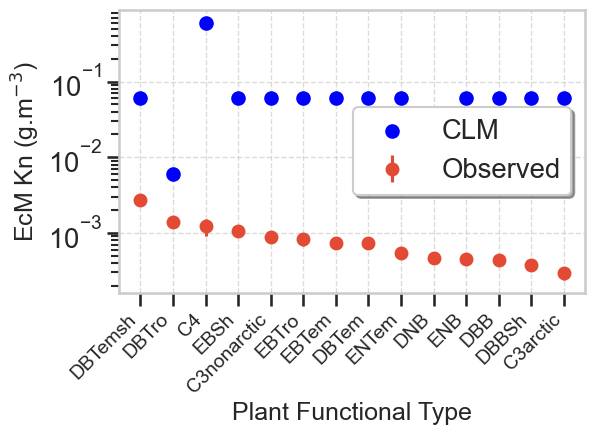

In [342]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Improved style settings for a professional look
plt.style.use('seaborn-whitegrid')
sns.set_context("talk", font_scale=1.2)

# Your data
pft_name = [
    "not_vegetated",
    "needleleaf_evergreen_temperate_tree",
    "needleleaf_evergreen_boreal_tree",
    "needleleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_tropical_tree",
    "broadleaf_evergreen_temperate_tree",
    "broadleaf_deciduous_tropical_tree",
    "broadleaf_deciduous_temperate_tree",
    "broadleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_shrub",
    "broadleaf_deciduous_temperate_shrub",
    "broadleaf_deciduous_boreal_shrub",
    "c3_arctic_grass",
    "c3_non-arctic_grass",
    "c4_grass"
]

# Your data
pft_abb = [
    'ENTem', 'ENB', 'DNB', 'EBTro', 'EBTem', 'DBTro', 'DBTem', 
    'DBB', 'EBSh', 'DBTemsh', 'DBBSh', 
    'C3arctic', 'C3nonarctic', 'C4'
]

# Define the list of names
my_xticks = pft_abb


# Sort average_costs in descending order and keep track of the indices to sort other arrays
sorted_indices = np.argsort(average_costs[1:15])[::-1]  # [1:15] to match your original slicing
sorted_average_costs = np.array(average_costs[1:15])[sorted_indices]
sorted_stds= np.array(std_devs[1:15])[sorted_indices]
sorted_ci_95s = np.array(ci_95s[1:15])[sorted_indices]


# Calculate lower and upper errors
lower_error = sorted_average_costs - sorted_ci_95s[:, 0]
upper_error = sorted_ci_95s[:, 1] - sorted_average_costs

# Combine lower and upper errors into a single array for plotting
sorted_error1 = upper_error
sorted_error2 = sorted_stds

# Sort other arrays based on sorted indices
sorted_pft_abb = np.array(pft_abb)[sorted_indices]
#sorted_error = np.array(error[1:15])[sorted_indices]
sorted_perecm = np.array(perecm[1:15])[sorted_indices]

# Define the x-axis values
x = np.arange(len(sorted_pft_abb))

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Calculate the error for each PFT (ci_95[1] - average_costs)
error = [ci[1] - avg for ci, avg in zip(ci_95s, average_costs)]

# Plot the data with error bars
ax.errorbar(x, sorted_average_costs, yerr=sorted_error2, fmt='o', label='Observed')
ax.scatter(x, sorted_perecm, label='CLM', color='blue')


# Set the x-axis labels and rotate them 45 degrees
ax.set_xticks(x)
ax.set_xticklabels(sorted_pft_abb, rotation=45, ha='right', fontsize=14)

# Add a legend
ax.legend(loc='best', frameon=True, shadow=True)

# Add grid
ax.grid(True, linestyle='--', linewidth=1, alpha=0.7)

# Add labels and title
ax.set_xlabel('Plant Functional Type', fontsize=18)
ax.set_ylabel(r'EcM Kn (g.m$^{-3}$)', fontsize=18)
#ax.set_title('Fungal Cost per PFT', fontsize=16)

# Set the y-axis to logarithmic scale
ax.set_yscale('log')

# Adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

plt.tight_layout()

plt.savefig("ekn_pft.png", dpi=300)

# Show the plot
plt.show()


/var/folders/w_/lxh510q93ln6zrtpz0_ktmq80000gn/T/ipykernel_93535/2333184283.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Model', 'Observed'], rotation=45,fontsize=18)
/var/folders/w_/lxh510q93ln6zrtpz0_ktmq80000gn/T/ipykernel_93535/2333184283.py:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


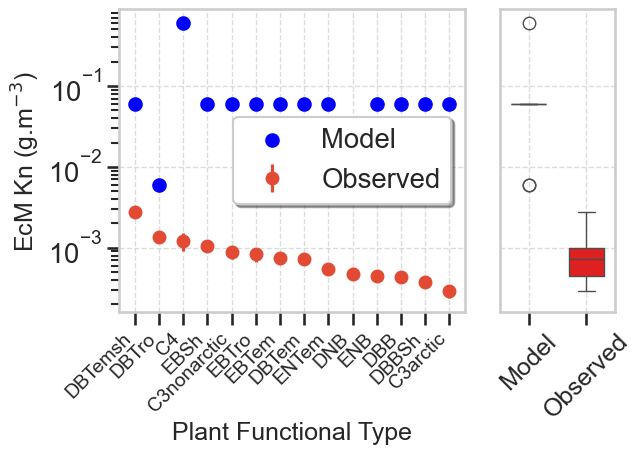

[0.09085714285714287, 0.0008672640071611448]
[0.14245342955449242, 0.0006067803369154798]


In [343]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Improved style settings for a professional look
plt.style.use('seaborn-whitegrid')
sns.set_context("talk", font_scale=1.2)

# Your data
pft_name = [
    "not_vegetated",
    "needleleaf_evergreen_temperate_tree",
    "needleleaf_evergreen_boreal_tree",
    "needleleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_tropical_tree",
    "broadleaf_evergreen_temperate_tree",
    "broadleaf_deciduous_tropical_tree",
    "broadleaf_deciduous_temperate_tree",
    "broadleaf_deciduous_boreal_tree",
    "broadleaf_evergreen_shrub",
    "broadleaf_deciduous_temperate_shrub",
    "broadleaf_deciduous_boreal_shrub",
    "c3_arctic_grass",
    "c3_non-arctic_grass",
    "c4_grass"
]

# Your data
pft_abb = [
    'ENTem', 'ENB', 'DNB', 'EBTro', 'EBTem', 'DBTro', 'DBTem', 
    'DBB', 'EBSh', 'DBTemsh', 'DBBSh', 
    'C3arctic', 'C3nonarctic', 'C4'
]

# Define the list of names
my_xticks = pft_abb


# Sort average_costs in descending order and keep track of the indices to sort other arrays
sorted_indices = np.argsort(average_costs[1:15])[::-1]  # [1:15] to match your original slicing
sorted_average_costs = np.array(average_costs[1:15])[sorted_indices]
sorted_stds= np.array(std_devs[1:15])[sorted_indices]
sorted_ci_95s = np.array(ci_95s[1:15])[sorted_indices]


# Calculate lower and upper errors
lower_error = sorted_average_costs - sorted_ci_95s[:, 0]
upper_error = sorted_ci_95s[:, 1] - sorted_average_costs

# Combine lower and upper errors into a single array for plotting
sorted_error1 = upper_error
sorted_error2 = sorted_stds

# Sort other arrays based on sorted indices
sorted_pft_abb = np.array(pft_abb)[sorted_indices]
#sorted_error = np.array(error[1:15])[sorted_indices]
sorted_perecm = np.array(perecm[1:15])[sorted_indices]

# Define the x-axis values
x = np.arange(len(sorted_pft_abb))

# Create a figure and a set of subplots
fig, ax = plt.subplots()
gs = GridSpec(1, 2, width_ratios=[3, 1], wspace=0.15)  # Adjusted spacing between plots

# Create the scatter and error bar plot
ax1 = plt.subplot(gs[0])

# Calculate the error for each PFT (ci_95[1] - average_costs)
error = [ci[1] - avg for ci, avg in zip(ci_95s, average_costs)]

# Plot the data with error bars
ax1.errorbar(x, sorted_average_costs, yerr=sorted_error2, fmt='o', label='Observed')
ax1.scatter(x, sorted_perecm, label='Model', color='blue')


# Set the x-axis labels and rotate them 45 degrees
ax1.set_xticks(x)
ax1.set_xticklabels(sorted_pft_abb, rotation=45, ha='right', fontsize=14)

# Add a legend
ax1.legend(loc='best', frameon=True, shadow=True)

# Add grid
ax1.grid(True, linestyle='--', linewidth=1, alpha=0.7)

# Add labels and title
ax1.set_xlabel('Plant Functional Type', fontsize=18)
ax1.set_ylabel(r'EcM Kn (g.m$^{-3}$)', fontsize=18)
#ax.set_title('Fungal Cost per PFT', fontsize=16)

# Set the y-axis to logarithmic scale
ax1.set_yscale('log')

# Create the box plot in the adjacent subplot
ax2 = plt.subplot(gs[1], sharey=ax1)  # Share y-axis with ax1
sns.boxplot(data=[sorted_perecm, sorted_average_costs], ax=ax2, width=0.6, palette=['blue', 'red'])
ax2.set_xticklabels(['Model', 'Observed'], rotation=45,fontsize=18)
#ax2.set_title('Comparison of CLM and Observed', fontsize=14)
ax2.set_ylabel('')  # Remove y-axis label to avoid redundancy


# Hide y-axis ticks and labels for ax2
ax2.tick_params(axis='y', which='both', left=False, labelleft=False)
# Add grid
ax2.grid(True, linestyle='--', linewidth=1, alpha=0.7)

# Adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

plt.tight_layout()

plt.savefig("ekn_pft_v2.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Calculate means and standard deviations
means = [np.mean(sorted_perecm), np.mean(sorted_average_costs)]
stds = [np.std(sorted_perecm), np.std(sorted_average_costs)]

print(means)
print(stds)


/var/folders/w_/lxh510q93ln6zrtpz0_ktmq80000gn/T/ipykernel_93535/3685271245.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['CLM', 'Observed'], fontsize=24)
/var/folders/w_/lxh510q93ln6zrtpz0_ktmq80000gn/T/ipykernel_93535/3685271245.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


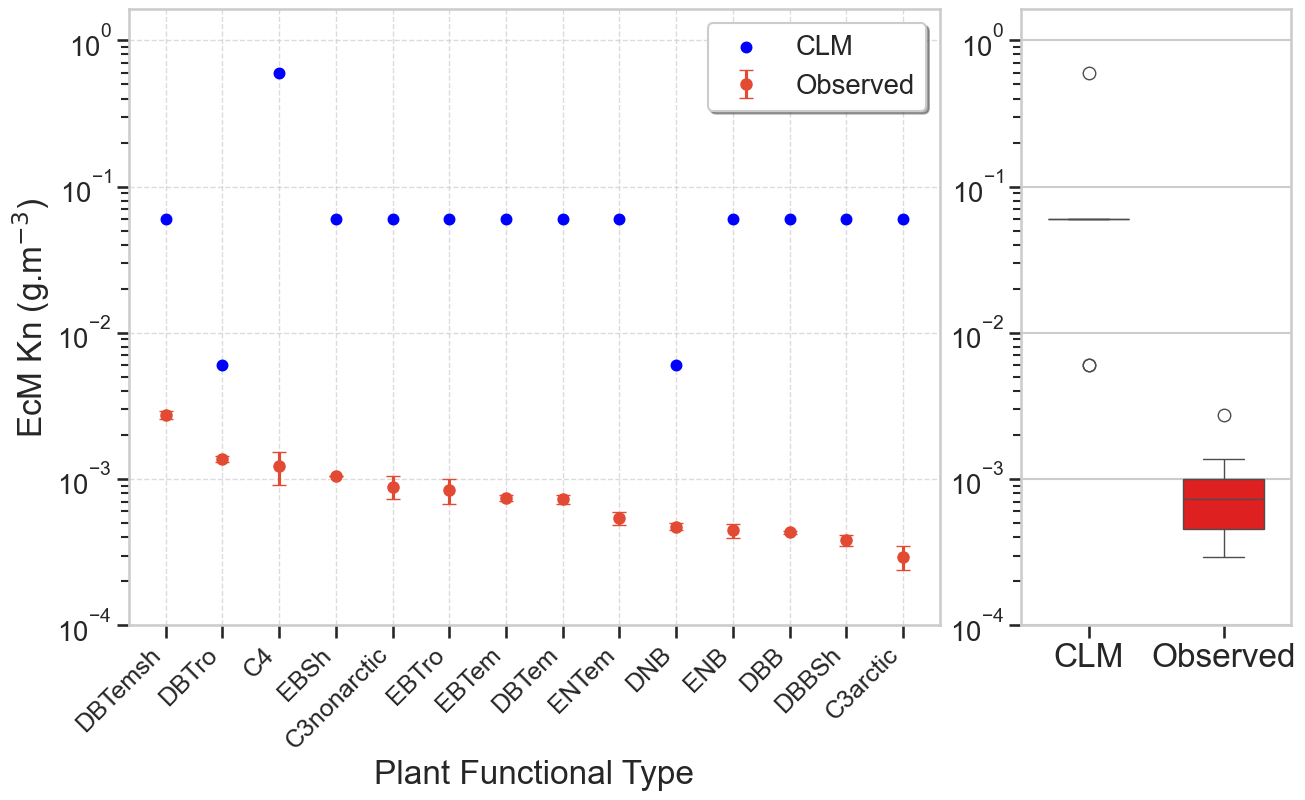

In [344]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Improved style settings for a professional look
plt.style.use('seaborn-whitegrid')
sns.set_context("talk", font_scale=1.2)

# Your data
# ...

# Abbreviations, sorting, and data preparation
# ...

# Create a figure with GridSpec for custom layout
fig = plt.figure(figsize=(15, 8))  # Adjusted size to accommodate both plots
gs = GridSpec(1, 2, width_ratios=[3, 1], wspace=0.15)  # Adjusted spacing between plots

# Create the scatter and error bar plot
ax1 = plt.subplot(gs[0])
ax1.errorbar(x, sorted_average_costs, yerr=sorted_error2, fmt='o', label='Observed', markersize=8, capsize=5)
ax1.scatter(x, sorted_perecm, label='CLM', color='blue', s=50)
ax1.set_xticks(x)
ax1.set_xticklabels(sorted_pft_abb, rotation=45, ha='right', fontsize=18)
ax1.set_xlabel('Plant Functional Type', fontsize=24)
ax1.set_ylabel(r'EcM Kn (g.m$^{-3}$)', fontsize=24)
ax1.legend(loc='best', frameon=True, shadow=True)

#ax1.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)
ax1.grid(True, linestyle='--', linewidth=1, alpha=0.7)

# Create the box plot in the adjacent subplot
ax2 = plt.subplot(gs[1], sharey=ax1)  # Share y-axis with ax1
sns.boxplot(data=[sorted_perecm, sorted_average_costs], ax=ax2, width=0.6, palette=['blue', 'red'])
ax2.set_xticklabels(['CLM', 'Observed'], fontsize=24)
#ax2.set_title('Comparison of CLM and Observed', fontsize=14)
ax2.set_ylabel('')  # Remove y-axis label to avoid redundancy

# Synchronize y-axis limits if needed
ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(bottom=1e-4, top=ylim+1e0)
ax2.set_ylim(bottom=1e-4, top=ylim+1e0)

# Set the y-axis to logarithmic scale
ax1.set_yscale('log')
ax2.set_yscale('log')

plt.tight_layout()

plt.savefig("ekn_pft_combined.png", dpi=300, bbox_inches='tight')  # Ensure no clipping

# Show the plot
plt.show()